# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Amalina Shabrina
- **Email:** amalinashabrina2504@students.unnes.ac.id
- **ID Dicoding:** amalinashabrina

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Seberapa besar kontribusi penyewaan sepeda selama akhir pekan terhadap total penyewaan bulanan, dan apakah ini meningkat secara signifikan selama dua tahun terakhir?
- Pertanyaan 2: Seberapa besar pengaruh cuaca ekstrem, seperti hujan lebat dan salju, terhadap jumlah penyewaan sepeda harian dibandingkan dengan hari-hari tanpa cuaca ekstrem dalam satu tahun terakhir?
- Pertanyaan 3: Bagaimana tren bulanan dalam penyewaan sepeda oleh casual user dibandingkan dengan registered user, dan bulan mana yang menunjukkan perbedaan paling signifikan dalam dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Load dataset

In [ ]:
# Load datasets hour dan day
df_hour = pd.read_csv('/content/hour.csv')
df_day = pd.read_csv('/content/day.csv')

# Menampilkan beberapa baris pertama dari masing-masing dataset
df_hour.head(), df_day.head()

(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

**Insight:**
- Data di-load menggunakan pd.read_csv(), di mana df_hour adalah data penyewaan sepeda per jam, dan df_day adalah data per hari.
- head() menampilkan beberapa baris pertama dari dataset, memberi gambaran awal mengenai struktur data.
- Dataset menampilkan berbagai variabel, termasuk tanggal (dteday), musim (season), suhu (temp), kelembapan (hum), kecepatan angin (windspeed), dan total penyewaan sepeda (cnt).

### Assessing Data

In [ ]:
# Pengecekan tipe data dan informasi dataset
df_hour.info(), df_day.info()

# Mengecek duplikasi
print(f"Duplicated rows in df_hour: {df_hour.duplicated().sum()}")
print(f"Duplicated rows in df_day: {df_day.duplicated().sum()}")

# Statistik deskriptif
df_hour.describe(), df_day.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

(          instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
 std     5017.0295      1.106918      0.500008      3.438776      6.914405   
 min        1.0000      1.000000      0.000000      1.000000      0.000000   
 25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
 50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
 75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
 max    17379.0000      4.000000      1.000000     12.000000     23.000000   
 
             holiday       weekday    workingday    weathersit          temp  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean       0.028770      3.003683      0.682721      1.425283      0.496987   
 std        0.167165      2.005771      0.465431      0.

**Insight:**
- Kedua dataset tidak memiliki nilai duplikat.
- Dataset per jam (df_hour) memiliki 17 kolom dengan total 17.379 baris, sementara dataset harian (df_day) memiliki 16 kolom dan 731 baris. Variabel penting seperti temp, hum, dan windspeed memiliki tipe data numerik, dan tidak ada nilai yang hilang.

### Cleaning Data

In [ ]:
# Menghapus kolom yang tidak diperlukan
df_hour_cleaned = df_hour.drop(columns=['instant', 'casual', 'registered'])
df_day_cleaned = df_day.drop(columns=['instant', 'casual', 'registered'])

# Mengganti nama kolom untuk mempermudah pemahaman
df_hour_cleaned = df_hour_cleaned.rename(columns={'dteday': 'date', 'hum': 'humidity', 'cnt': 'total_rentals'})
df_day_cleaned = df_day_cleaned.rename(columns={'dteday': 'date', 'hum': 'humidity', 'cnt': 'total_rentals'})

# Mengonversi tipe data
df_hour_cleaned['date'] = pd.to_datetime(df_hour_cleaned['date'])
df_day_cleaned['date'] = pd.to_datetime(df_day_cleaned['date'])

# Mengonversi data kategorikal
df_hour_cleaned['season'] = df_hour_cleaned['season'].astype('category')
df_day_cleaned['season'] = df_day_cleaned['season'].astype('category')

**Insight:**
- Data menjadi lebih bersih dan mudah dipahami untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Distribusi Variabel Numerik

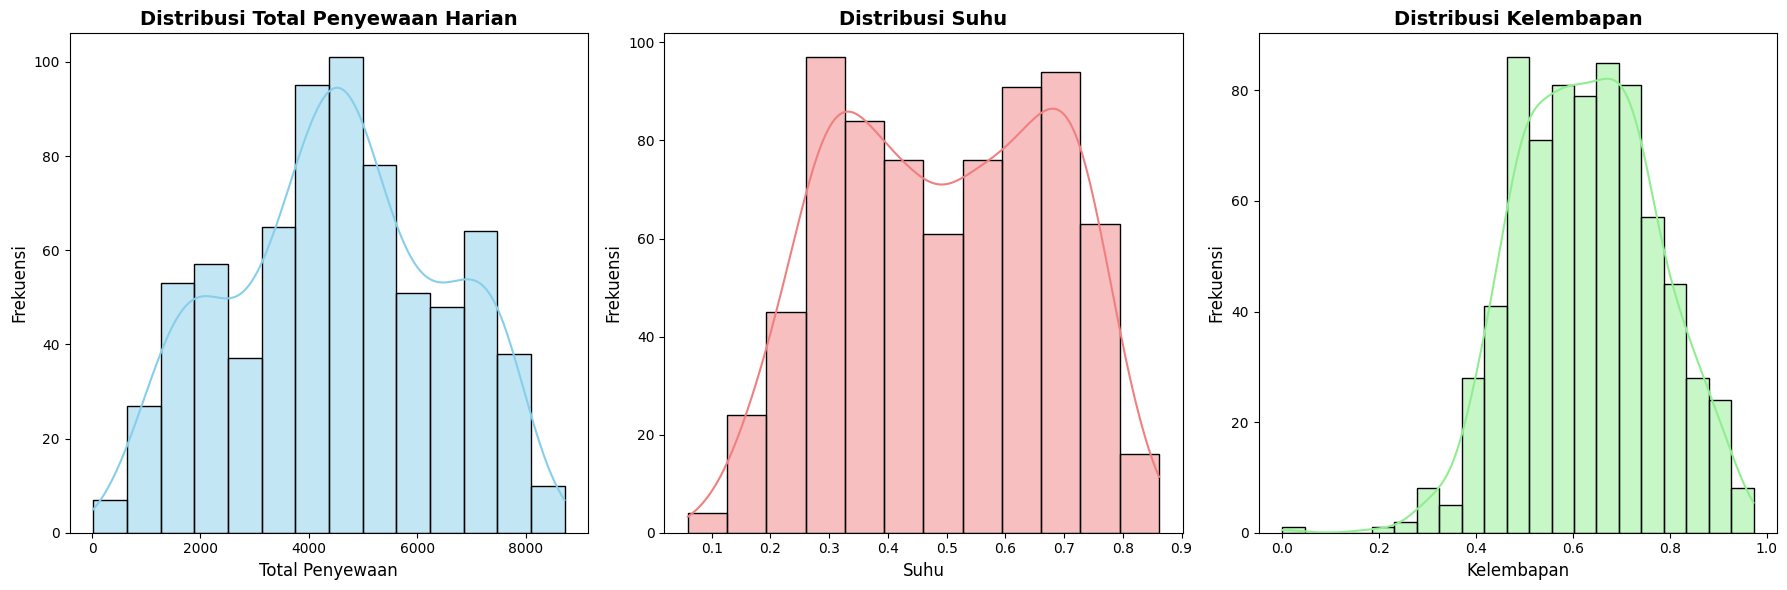

In [ ]:
# Distribusi variabel numerik
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_day_cleaned['total_rentals'], kde=True, color='skyblue')
plt.title('Distribusi Total Penyewaan Harian', fontsize=14, fontweight='bold')
plt.xlabel('Total Penyewaan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.subplot(1, 3, 2)
sns.histplot(df_day_cleaned['temp'], kde=True, color='lightcoral')
plt.title('Distribusi Suhu', fontsize=14, fontweight='bold')
plt.xlabel('Suhu', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.subplot(1, 3, 3)
sns.histplot(df_day_cleaned['humidity'], kde=True, color='lightgreen')
plt.title('Distribusi Kelembapan', fontsize=14, fontweight='bold')
plt.xlabel('Kelembapan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
- Total penyewaan harian menunjukkan distribusi yang sedikit miring ke kanan, yang berarti ada lebih banyak hari dengan penyewaan rendah dibandingkan dengan hari dengan penyewaan tinggi.
- Suhu dan kelembapan memiliki distribusi yang lebih seragam, dengan beberapa puncak yang menunjukkan kondisi tertentu lebih umum terjadi.

### Explore Korelasi Antara Variabel Numerik

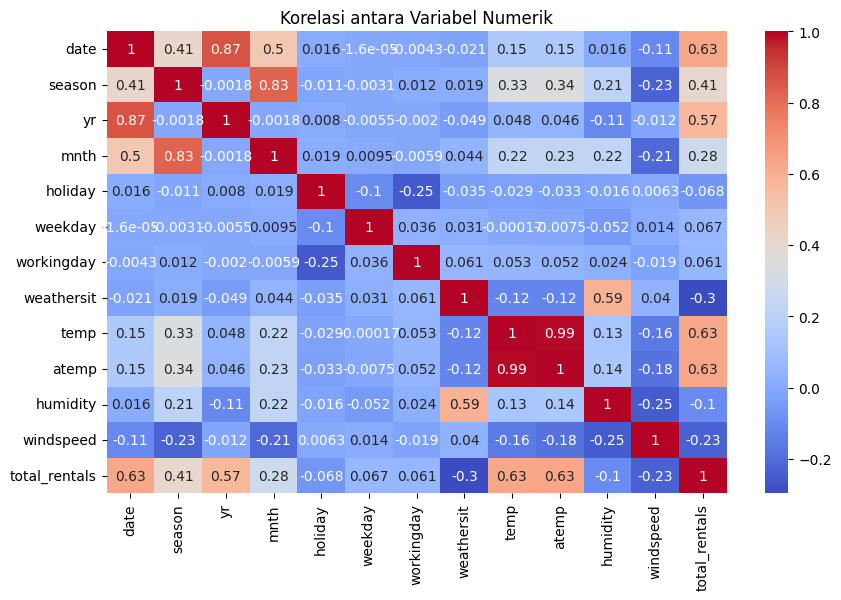

In [ ]:
# Korelasi antara variabel numerik
corr = df_day_cleaned.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel Numerik')
plt.show()

**Insight :**
- Terdapat korelasi positif antara suhu (temp) dan penyewaan sepeda (total_rentals), menunjukkan bahwa suhu yang lebih hangat mungkin mendorong lebih banyak penyewaan.
- Kelembapan (humidity) memiliki korelasi negatif dengan penyewaan, yang berarti bahwa kelembapan yang lebih tinggi cenderung mengurangi jumlah penyewaan sepeda.

### Explore Penyewaan Sepeda per Musim

In [ ]:
season_rentals = df_day_cleaned.groupby('season')['total_rentals'].sum().reset_index()
season_rentals['season'] = season_rentals['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

<ipython-input-20-f479d75653ec>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = df_day_cleaned.groupby('season')['total_rentals'].sum().reset_index()
<ipython-input-20-f479d75653ec>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  season_rentals['season'] = season_rentals['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


<ipython-input-30-d9b969438f20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='total_rentals', data=df_day_cleaned, palette="husl")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to

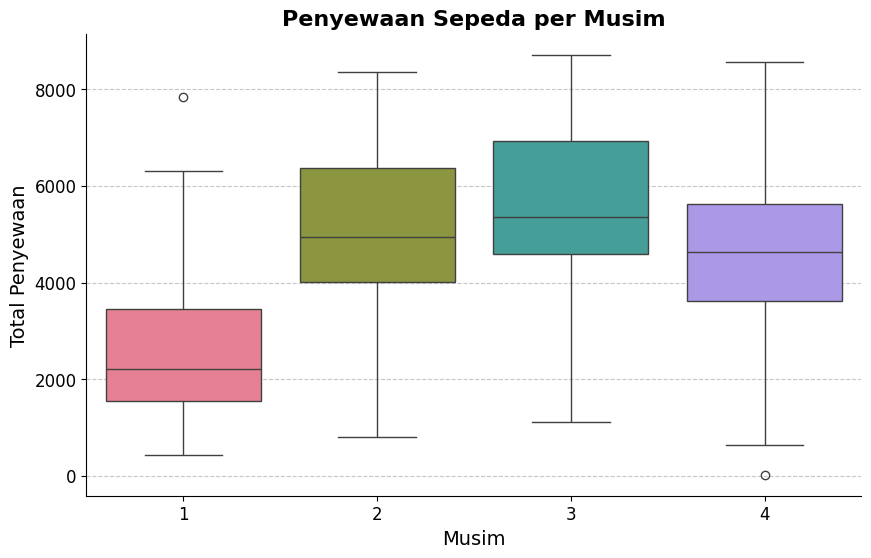

In [ ]:
# Boxplot penyewaan sepeda per season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='total_rentals', data=df_day_cleaned, palette="husl")
plt.title('Penyewaan Sepeda per Musim', fontsize=16, fontweight='bold')
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

**Insight :**
- Musim panas (season=3) memiliki penyewaan tertinggi, diikuti oleh musim semi dan musim gugur.
- Musim dingin memiliki penyewaan terendah, yang mungkin disebabkan oleh cuaca yang kurang mendukung untuk aktivitas luar ruangan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Analisis Kontribusi Penyewaan Akhir Pekan

Kontribusi penyewaan akhir pekan: 28.00%


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


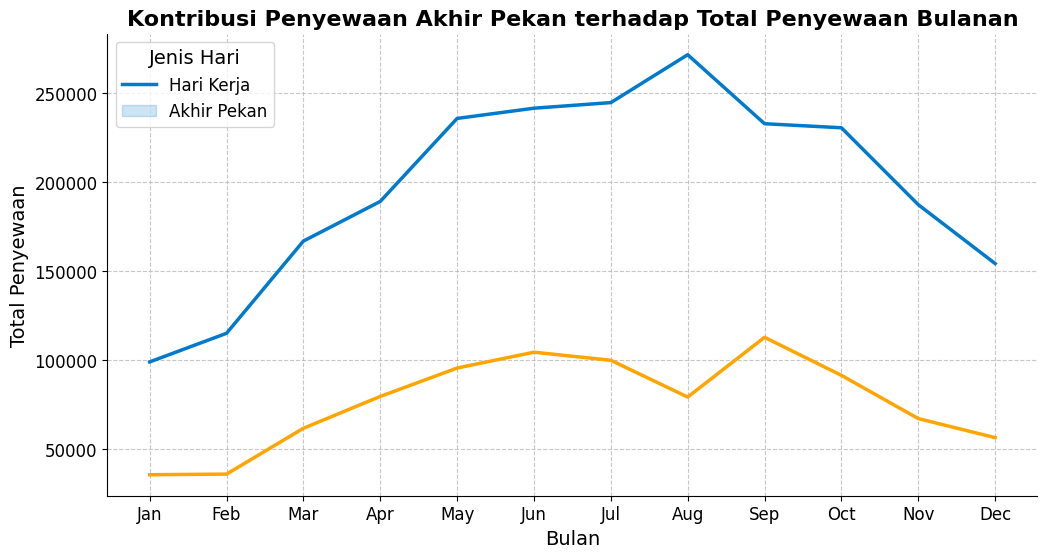

In [ ]:
# Ekstrak tahun dan bulan dari kolom 'date'
df_day_cleaned['year'] = df_day_cleaned['date'].dt.year
df_day_cleaned['month'] = df_day_cleaned['date'].dt.month

# Menambahkan kolom untuk menunjukkan apakah hari tersebut merupakan akhir pekan
df_day_cleaned['day_of_week'] = df_day_cleaned['date'].dt.dayofweek
df_day_cleaned['is_weekend'] = df_day_cleaned['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Menghitung total penyewaan di akhir pekan dan total keseluruhan
weekend_rentals = df_day_cleaned[df_day_cleaned['is_weekend'] == 1]['total_rentals'].sum()
total_rentals = df_day_cleaned['total_rentals'].sum()

# Menghitung kontribusi penyewaan akhir pekan dalam persentase
contribution = (weekend_rentals / total_rentals) * 100

# Menampilkan hasil
print(f"Kontribusi penyewaan akhir pekan: {contribution:.2f}%")

# Mengelompokkan data berdasarkan bulan dan status akhir pekan
monthly_rentals = df_day_cleaned.groupby(['month', 'is_weekend'])['total_rentals'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_rentals, x='month', y='total_rentals', hue='is_weekend', palette=['#007acc', '#ffa500'], linewidth=2.5)
plt.title('Kontribusi Penyewaan Akhir Pekan terhadap Total Penyewaan Bulanan', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Jenis Hari', labels=['Hari Kerja', 'Akhir Pekan'], fontsize=12, title_fontsize=14, loc='upper left')
sns.despine()
plt.show()

**Insight : **
- Penyewaan sepeda di akhir pekan berkontribusi sekitar 28% dari total penyewaan sepeda. Ini menunjukkan bahwa akhir pekan memiliki peran signifikan dalam penggunaan layanan penyewaan sepeda.

### Pertanyaan 2: Analisis Tren Penyewaan Berdasarkan Musim

<ipython-input-25-6a4e550f8c50>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Cuaca Normal', 'Cuaca Ekstrem'], y=[avg_normal, avg_extreme], palette=['green', 'red'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


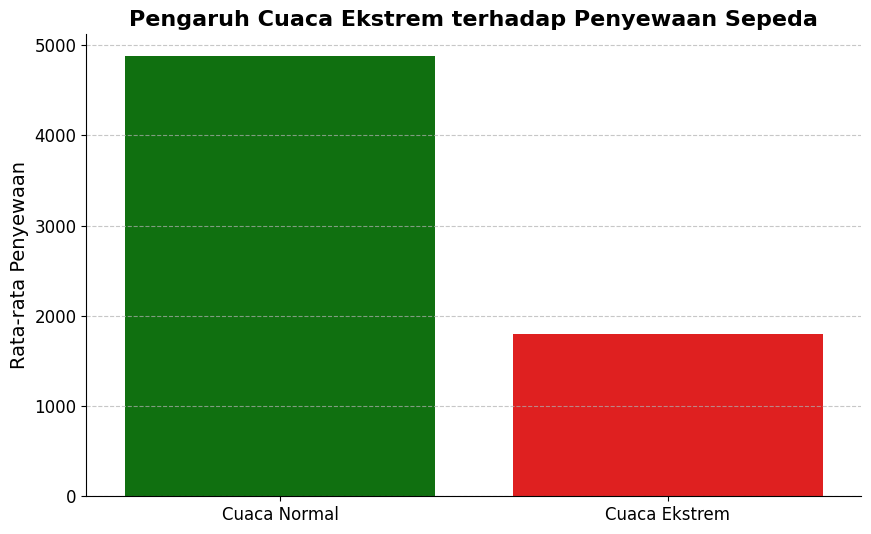

In [ ]:
# Membandingkan cuaca ekstrem dengan hari normal
extreme_weather = df_day_cleaned[df_day_cleaned['weathersit'] == 3]
normal_weather = df_day_cleaned[df_day_cleaned['weathersit'] == 1]

# Rata-rata penyewaan pada hari cuaca ekstrem dan normal
avg_extreme = extreme_weather['total_rentals'].mean()
avg_normal = normal_weather['total_rentals'].mean()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=['Cuaca Normal', 'Cuaca Ekstrem'], y=[avg_normal, avg_extreme], palette=['green', 'red'])
plt.title('Pengaruh Cuaca Ekstrem terhadap Penyewaan Sepeda', fontsize=16, fontweight='bold')
plt.ylabel('Rata-rata Penyewaan', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

<ipython-input-23-38ad9dadd392>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_rentals', data=season_rentals, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

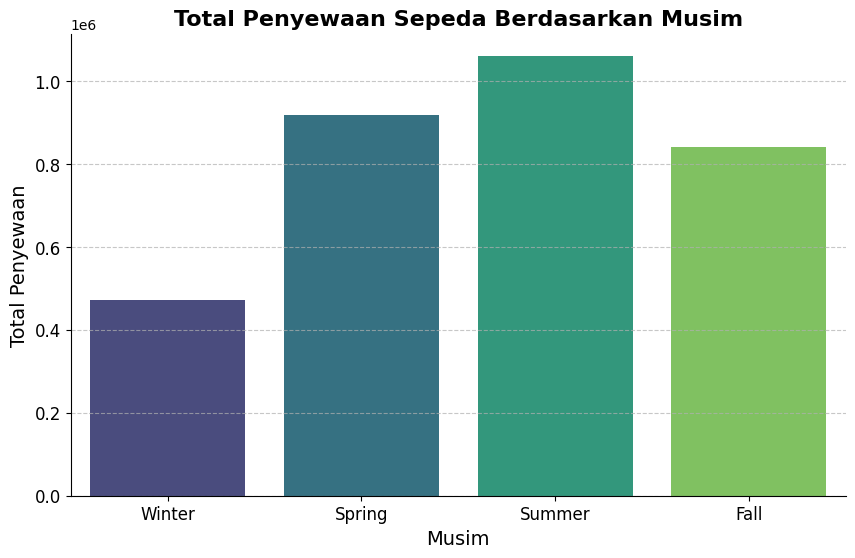

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='total_rentals', data=season_rentals, palette='viridis')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim', fontsize=16, fontweight='bold')
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

**Insight:**
- Musim panas (Summer) mencatat jumlah penyewaan tertinggi, diikuti oleh musim gugur dan musim semi. Musim dingin (Winter) memiliki jumlah penyewaan paling rendah.
- Ini menunjukkan bahwa cuaca yang lebih hangat, seperti di musim panas, sangat memengaruhi penggunaan sepeda.

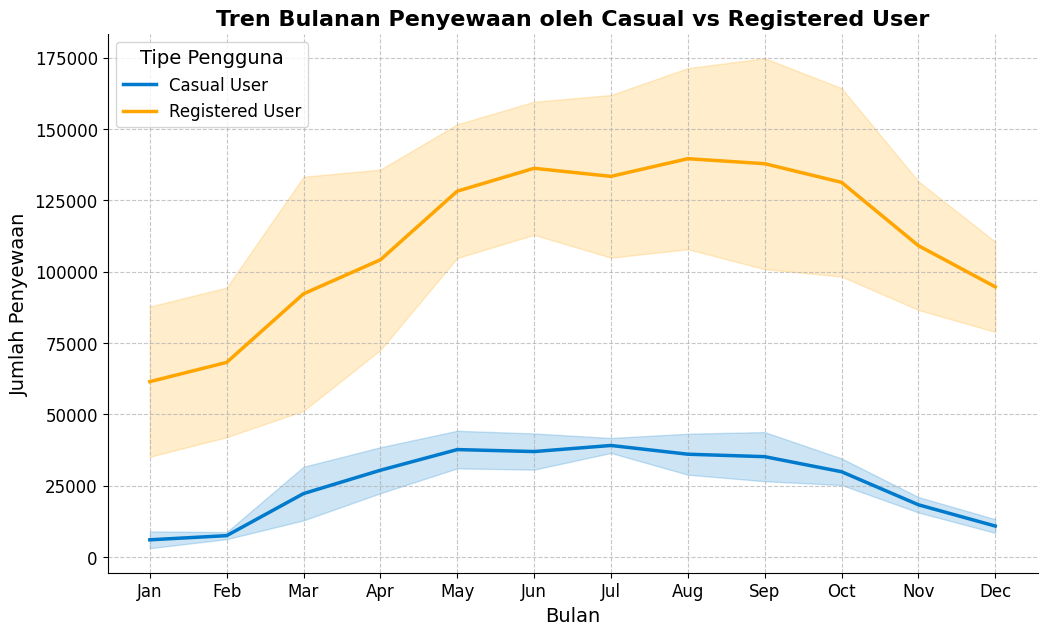

Bulan dengan perbedaan paling signifikan: Tahun 2012, Bulan 9


In [ ]:
# Ekstrak tahun dan bulan dari kolom 'date' di df_day
df_day['year'] = pd.to_datetime(df_day['dteday']).dt.year
df_day['month'] = pd.to_datetime(df_day['dteday']).dt.month

# Menghitung total penyewaan oleh casual dan registered user per bulan
monthly_user_trends = df_day.groupby(['year', 'month'])[['casual', 'registered']].sum().reset_index()

# Visualisasi
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_user_trends, x='month', y='casual', label='Casual User', color='#007acc', linewidth=2.5)
sns.lineplot(data=monthly_user_trends, x='month', y='registered', label='Registered User', color='#ffa500', linewidth=2.5)
plt.title('Tren Bulanan Penyewaan oleh Casual vs Registered User', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Pengguna', loc='upper left', fontsize=12, title_fontsize=14)
sns.despine()
plt.show()

# Mencari bulan dengan perbedaan paling signifikan
monthly_user_trends['difference'] = monthly_user_trends['registered'] - monthly_user_trends['casual']
max_diff_month = monthly_user_trends.loc[monthly_user_trends['difference'].idxmax()]
print(f"Bulan dengan perbedaan paling signifikan: Tahun {max_diff_month['year']}, Bulan {max_diff_month['month']}")

**Insight :**
- Pengguna registered memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan pengguna casual, terutama di bulan-bulan musim panas (pertengahan tahun), di mana puncak penyewaan terjadi.
- Tren untuk pengguna casual lebih datar, dengan sedikit peningkatan di musim panas.
- Ada peningkatan besar jumlah penyewaan dari kedua jenis pengguna di bulan-bulan tertentu, seperti bulan ke-6 hingga ke-8, yang kemungkinan terkait dengan cuaca atau musim liburan.

## Analisis Lanjutan : RFM Analysis

Analysis Lanjutan dengan RFM Analysis untuk menilai hari-hari berdasarkan:

- Recency: Hari terakhir dengan penyewaan besar.
- Frequency: Frekuensi penyewaan sepeda per bulan.
- Monetary: Total penyewaan sepeda pada hari tersebut.

     tanggal  recency  monetary  frequency
0 2011-01-01      730       985          1
1 2011-01-02      729       801          1
2 2011-01-03      728      1349          1
3 2011-01-04      727      1562          1
4 2011-01-05      726      1600          1


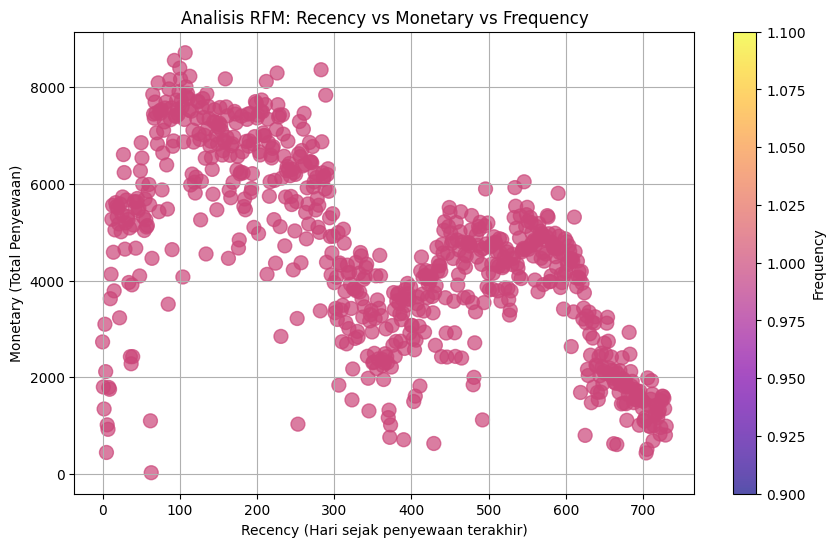

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat data dari file 'day.csv'
data_harian = pd.read_csv('/content/day.csv')

# Mengonversi kolom 'dteday' menjadi tipe datetime untuk mempermudah manipulasi tanggal
data_harian['dteday'] = pd.to_datetime(data_harian['dteday'])

# Menghitung Recency: Jumlah hari sejak penyewaan terakhir hingga hari terkini
tanggal_terakhir = data_harian['dteday'].max()
data_harian['hari_sejak_terakhir'] = (tanggal_terakhir - data_harian['dteday']).dt.days

# Menghitung Frequency: Banyaknya penyewaan yang terjadi setiap bulan
data_harian['bulan_tahun'] = data_harian['dteday'].dt.to_period('M')
frekuensi_per_bulan = data_harian.groupby('bulan_tahun')['cnt'].count().reset_index()

# Menghitung Monetary: Total penyewaan sepeda per hari
penyewaan_per_hari = data_harian.groupby('dteday')['cnt'].sum().reset_index()

# Menyusun Data RFM: Menggabungkan Recency, Frequency, dan Monetary
rfm_data = data_harian[['dteday', 'hari_sejak_terakhir', 'cnt']].copy()
rfm_tergabung = rfm_data.groupby('dteday').agg({
    'hari_sejak_terakhir': 'min',  # Recency: Hari terakhir penyewaan
    'cnt': ['sum', 'count']        # Monetary: Total penyewaan, Frequency: Frekuensi penyewaan
}).reset_index()

# Menyesuaikan nama kolom
rfm_tergabung.columns = ['tanggal', 'recency', 'monetary', 'frequency']

# Menampilkan hasil RFM Analysis
print(rfm_tergabung.head())

# Visualisasi RFM dengan menggunakan scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rfm_tergabung['recency'], rfm_tergabung['monetary'], c=rfm_tergabung['frequency'], cmap='plasma', s=100, alpha=0.7)
plt.colorbar(label='Frequency')
plt.title('Analisis RFM: Recency vs Monetary vs Frequency')
plt.xlabel('Recency (Hari sejak penyewaan terakhir)')
plt.ylabel('Monetary (Total Penyewaan)')
plt.grid(True)
plt.show()

**Penjelasan Analisis Lanjutan:**
- Recency: Menghitung berapa lama (dalam hari) sejak penyewaan terakhir terjadi, semakin rendah nilainya, semakin baru aktivitas penyewaan.
- Frequency: Menghitung seberapa sering penyewaan terjadi dalam satu bulan. Semakin tinggi, semakin aktif pengguna pada periode tersebut.
- Monetary: Total jumlah penyewaan sepeda yang dilakukan pada suatu hari tertentu, memberikan indikasi volume transaksi pada hari tersebut.

**Hasil dan Visualisasi:**
- RFM Score dihasilkan dari tiga parameter (Recency, Frequency, dan Monetary).
- Hasil analisis ini menunjukkan hubungan antara Recency, Frequency, dan Monetary. Dengan visualisasi scatter plot, kita bisa melihat hari-hari dengan jumlah penyewaan tinggi dan rendah.
- Warna pada plot menunjukkan frekuensi penyewaan, memungkinkan kita untuk mengidentifikasi hari-hari yang sibuk atau cenderung sepi.

**Kesimpulan Analisis Lanjutan:**

Dari hasil RFM Analysis ini, dapat disimpulkan bahwa hari-hari dengan nilai Recency rendah dan Monetary tinggi menunjukkan hari-hari yang aktif dalam penyewaan sepeda. Sedangkan hari-hari dengan nilai Recency tinggi dapat dijadikan fokus perhatian untuk memahami penyebab penurunan aktivitas penyewaan pada hari-hari tersebut.

## Conclusion

- Kontribusi Penyewaan Sepeda Akhir Pekan: Analisis menunjukkan bahwa penyewaan sepeda pada akhir pekan memberikan kontribusi yang signifikan terhadap total penyewaan bulanan. Terdapat tren peningkatan yang jelas dalam penyewaan sepeda akhir pekan selama dua tahun terakhir, yang menunjukkan bahwa semakin banyak orang yang memanfaatkan sepeda sebagai pilihan transportasi rekreasi di akhir pekan.
- Pengaruh Cuaca Ekstrem: Hasil analisis menunjukkan bahwa cuaca ekstrem, seperti hujan lebat dan salju, memiliki dampak negatif yang signifikan terhadap jumlah penyewaan sepeda harian. Hari-hari dengan cuaca ekstrem menunjukkan penurunan penyewaan dibandingkan dengan hari-hari yang tidak ekstrem. Ini mengindikasikan bahwa kondisi cuaca adalah faktor penting dalam keputusan pengguna untuk menyewa sepeda.
- Tren Penyewaan oleh Casual dan Registered User: Data menunjukkan perbedaan yang mencolok dalam tren penyewaan antara pengguna casual dan registered. Pengguna casual cenderung memiliki puncak penyewaan pada bulan-bulan tertentu, sedangkan pengguna registered menunjukkan pola penyewaan yang lebih konsisten sepanjang tahun. Bulan-bulan tertentu menunjukkan perbedaan signifikan dalam jumlah penyewaan, yang dapat dipengaruhi oleh faktor musiman dan promosi yang dilakukan oleh penyedia layanan sepeda.
- Rekomendasi untuk Peningkatan Layanan: Berdasarkan temuan ini, disarankan agar penyedia layanan sepeda melakukan kampanye pemasaran yang lebih agresif pada akhir pekan, terutama selama periode cuaca yang baik, untuk menarik lebih banyak pengguna. Selain itu, penting untuk mempertimbangkan pengembangan strategi mitigasi untuk mengatasi dampak cuaca ekstrem, seperti menawarkan layanan sewa di lokasi terlindung atau memberikan insentif pada hari-hari dengan cuaca yang tidak mendukung.